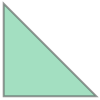

In [5]:
import arcpy as ap
import arcpy

point = ap.Point(45.7296,95.6859)
point1 = ap.Point(45.7296,94.6859)
point2 = ap.Point(46.7296,94.6859)

pList = [point, point1, point2]
pList

array = arcpy.Array()
array.extend(pList)
pLine = ap.Polyline(array)
ap.Polygon(array)


In [29]:
FeatureClass = arcpy.management.CreateFeatureclass(r"C:\Users\umn-ahmad178\Downloads\Telegram Desktop", 
                                                   "lab12.shp", "POLYGON")




In [31]:
cursor = arcpy.da.InsertCursor(FeatureClass, ["SHAPE@"])

point = ap.Point(45.7296,95.6859)
point1 = ap.Point(45.7296,94.6859)
point2 = ap.Point(46.7296,94.6859)

pList = [point, point1, point2]
pList

array = arcpy.Array()
array.extend(pList)
pLine = ap.Polyline(array)



spatial_reference = arcpy.SpatialReference(4326)

polygon = ap.Polygon(array, spatial_reference)

cursor.insertRow([polygon])



0

In [ ]:
path = r"C:\Users\umn-ahmad178\Downloads\Telegram Desktop\lab12.shp"

arcpy.management.AddField(path, 'name', 'Text')


In [44]:
wkt = polygon.WKT
wkt


'MULTIPOLYGON (((45.729600000000062 95.685900000000061, 45.729600000000062 94.685900000000061, 46.729600000000062 94.685900000000061, 45.729600000000062 95.685900000000061)))'

In [100]:
import arcpy
import psycopg2
connection = psycopg2.connect("dbname='lab0' user='postgres' host='' password='**'")
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS lab12poly")
cursor.execute("CREATE EXTENSION IF NOT EXISTS postgis; CREATE TABLE lab12poly (id integer, name Text,  geom geography(MultiPolygon,4326));")

connection.commit()

q = f'''
INSERT INTO lab12poly VALUES (1234, 'random poly',ST_GeomFromWKB(ST_AsEWKB(ST_GeomFromText('{wkt}')),4326)

);
'''
cursor.execute(q)
connection.commit()
    

In [20]:
shp_p =  r'C:\Users\umn-ahmad178\Documents\ArcGIS\Projects\lab12\tempdata\temp3.shp'
fc = arcpy.MakeFeatureLayer_management(shp_p) 


In [4]:
# This shapefile is created using the GUI (for visual polygon creation)
# This cell removes the Z & M part
import arcpy
from arcpy import env
env.workspace =  r'C:\Users\umn-ahmad178\Documents\ArcGIS\Projects\lab12\tempdata'
inFeature = "temp3.shp"
outFeature = "temp3d.shp"
env.outputZFlag = "DISABLED"
env.outputMFlag = "DISABLED"
arcpy.FeatureClassToFeatureClass_conversion(inFeature, env.workspace, outFeature)

<Result 'C:\\Users\\umn-ahmad178\\Documents\\ArcGIS\\Projects\\lab12\\tempdata\\temp3d.shp'>

In [3]:

shp_p =  r'C:\Users\umn-ahmad178\Documents\ArcGIS\Projects\lab12\tempdata\temp3.shp'


fc = arcpy.MakeFeatureLayer_management(shp_p) 

i = 0

for row in arcpy.da.SearchCursor(fc, ['id','name',"SHAPE@"]):
    i += 1
    polygeom = row[2].WKT
    if i == 1:
        print(polygeom)
#     cursor.execute(q)
#     connection.commit()

MULTIPOLYGON ZM (((-93.601964055999986 45.145880575000035 0 NAN, -93.589066216999981 44.744211760000042 0 NAN, -93.016662980999968 44.753450864000058 0 NAN, -93.029560819999972 45.155055254000047 0 NAN, -93.601964055999986 45.145880575000035 0 NAN)))


In [10]:
# Working Fine
import arcpy
import psycopg2
shp_p =  r'C:\Users\umn-ahmad178\Documents\ArcGIS\Projects\lab12\tempdata\temp3d.shp'
fc = arcpy.MakeFeatureLayer_management(shp_p) 
connection = psycopg2.connect("dbname='lab0' user='postgres' host='' password='**'")
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS lab12poly")
cursor.execute("CREATE EXTENSION IF NOT EXISTS postgis; CREATE TABLE lab12poly (id integer, name Text,  geom geography(MultiPolygon,4326));")

connection.commit()
i = 0
for row in arcpy.da.SearchCursor(fc, ['id','name',"SHAPE@"]):
    i+=1
    print(i)
    wkt = row[2].WKT
    pid = row[0]
    name = row[1]
    q = f'''
    INSERT INTO lab12poly VALUES ({pid}, '{name}',ST_GeomFromWKB(ST_AsEWKB(ST_GeomFromText('{wkt}')))

    );
    '''
    cursor.execute(q)
    connection.commit()
    
    

1
2
3
4
5
6


In [9]:
# Working Fine
import arcpy
import psycopg2
shp_p =  r'C:\Users\umn-ahmad178\Documents\ArcGIS\Projects\lab12\tempdata\states.shp'
fc = arcpy.MakeFeatureLayer_management(shp_p) 
connection = psycopg2.connect("dbname='lab0' user='postgres' host='' password='**'")
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS states")
cursor.execute("CREATE EXTENSION IF NOT EXISTS postgis; CREATE TABLE states (geoid Text, stusps Text, name Text, region Text,  geom geography(MULTIPOLYGON));")

connection.commit()
i = 0
for row in arcpy.da.SearchCursor(fc, ['GEOID','STUSPS','NAME','region','SHAPE@']):
    i+=1
    print(i)
    wkt = row[4].WKT
    geoid = row[0]
    stusps = row[1]
    name = row[2]
    region = row[3]
    q = f'''
    INSERT INTO states VALUES ('{geoid}', '{stusps}', '{name}', '{region}', ST_GeomFromWKB(ST_AsEWKB(ST_GeomFromText('{wkt}')))

    );
    '''
    cursor.execute(q)
    connection.commit()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [21]:
q = f'''
SELECT jsonb_build_object(
'type',     'FeatureCollection',
'features', jsonb_agg(feature)
                )
    FROM (
        SELECT jsonb_build_object(
        'type',       'Feature',
            'id',         geoid,
        'geometry',   ST_AsGeoJSON(geom)::jsonb,
'properties', to_jsonb(inputs) - 'geoid' - 'geom')
AS feature
FROM (
    SELECT * FROM states WHERE lower(name) = 'iowa'
                            ) inputs
                        )features;
                        '''

conn = psycopg2.connect("dbname='lab0' user='postgres' host='' password='**'")
cursor = conn.cursor()
cursor.execute(q)
data = cursor.fetchall()
data[0][0]


{'type': 'FeatureCollection',
 'features': [{'id': '19',
   'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-96.621875, 42.779255],
       [-96.624704, 42.725497],
       [-96.591602, 42.688081],
       [-96.526766, 42.641184],
       [-96.480022479, 42.561324777],
       [-96.476952, 42.556079],
       [-96.49297, 42.517282],
       [-96.477454, 42.509589],
       [-96.445508, 42.49063],
       [-96.381307, 42.461694],
       [-96.411808, 42.410894],
       [-96.407998, 42.337408],
       [-96.351957192, 42.280894705],
       [-96.336003, 42.264806],
       [-96.336323, 42.218922],
       [-96.337216095, 42.214849507],
       [-96.347752, 42.166806],
       [-96.2689, 42.11359],
       [-96.272877, 42.047238],
       [-96.223611, 42.022652],
       [-96.132537, 41.974625],
       [-96.159098, 41.910057],
       [-96.126821253, 41.866095248],
       [-96.107911, 41.840339],
       [-96.064537, 41.793002],
       [-96.0876, 41.72218],
       [-96.107937